The articles in this blog are written as [Jupyter notebooks](https://jupyter.org/) – interactive documents that contain text, Python code, and the results of running the code (i.e. text or figures). This article gives some details on the various ways to use them and explains common commands we use when presenting Brian code.

While the documents are "static" on this website, i.e. you can neither change nor run the code, you have two options to interactively explore and modify their content:

<!-- TEASER_END -->

**Option 1**: You run it in the browser, using the [mybinder.org](https://mybinder.org) infrastructure. For this, each article has a badge that you can click to launch the interactive notebook: [![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/brian-team/briansimulator.org/master?filepath=articles%2F2020%2FNotes%20on%20Notebooks.ipynb)

**Option 2**: You download the notebook to your own machine, using the "Source" link on the top right of the page. In this case, you need to have the relevant software installed on your own machine – for the articles here that means at least Brian with its dependencies, [matplotlib](https://matplotlib.org/users/installing.html) for the plotting support, and the [Jupyter notebook](https://jupyter.org/install.html) or [Jupyter Lab](https://jupyter.org/install.html) software itself. If you then [run the notebook server](https://jupyter.readthedocs.io/en/latest/running.html) or [Jupyter lab](https://jupyterlab.readthedocs.io/en/latest/getting_started/starting.html) from the directory where you downloaded the notebook, you can select the downloaded notebook and start using it.

## Run code in a notebook

To run the code:
1. Click on the cell to select it.
2. Press SHIFT+ENTER on your keyboard or press the play button (<button class='fa fa-play icon-play btn btn-xs btn-default'></button>) in the toolbar above.

Feel free to create new cells using the plus button (<button class='fa fa-plus icon-plus btn btn-xs btn-default'></button>), or pressing SHIFT+ENTER while this cell is selected.

## Brian-specific notes
Since our articles run code with the Brian simulator, they typically start with the following import:

In [1]:
from brian2 import *

This makes all Brian functions and objects available in the current namespace, i.e. you can directly use e.g. `NeuronGroup` or `mV`. It also imports numpy and matplotlib (if installed), so you can use e.g. `np.arange`, or `plt.plot`. In your own scripts, you might prefer to import `brian2` differently to not "pollute" your namespace with so many names, have a look at [the documentation](https://brian2.readthedocs.io/en/stable/user/import.html) for alternatives.

In many articles, we then set the [code generation target](https://brian2.readthedocs.io/en/stable/user/computation.html) to "numpy":

In [2]:
prefs.codegen.target = 'numpy'

This essentially means that we switch off the code generation to more efficient C++ code. The reason for this is simple: code generation can significantly speed up simulations but it also comes with a cost, the code has to be generated and compiled. In our articles, we often use "toy models" that are so simple that this extra step takes more time than what the optimization saves...

### Plotting
In an interactive notebook, it is much nicer to be able to interact with the plots as well, e.g. we might want to zoom or pan. This is enabled with the following notebook-specific command (i.e., don't use this in a script outside of a notebook):

In [3]:
%matplotlib notebook

Using this interface is often a source for confusion, though: when you use matplotlib's pyplot interface (`plt.plot`, etc.), you cannot easily use more than one plot. We will therefore use matplotlib's object-oriented interface instead. This approach looks slightly more complicated for simple plots, but does not have problems with multiple plots, and also easily extends to more complex plots (multiple subplots, for example):

<IPython.core.display.Javascript object>


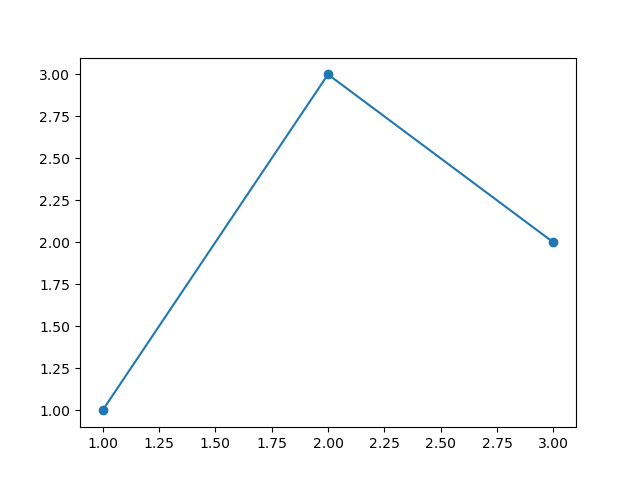

In [4]:
fig, ax = plt.subplots()  # Create a new plot with a single axis
ax.plot([1, 2, 3], [1, 3, 2], 'o-')  # plot to the axis

As you can see above, plotting adds some annoying print output in the end (which can be much longer for more complex plots). To avoid this, we can add a semicolon to the last line of our plotting code:

<IPython.core.display.Javascript object>


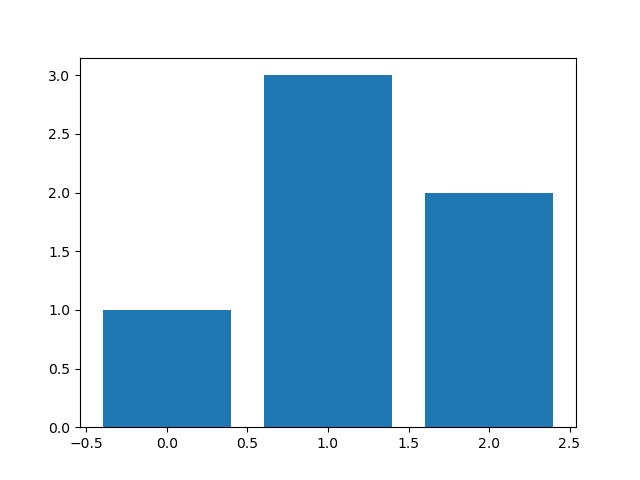

In [5]:
fig, ax = plt.subplots()
ax.bar([0, 1, 2], [1, 3, 2]);

### Brian simulations

In Brian, you can run a simulation by simply calling the `run()` function. How does Brian know which neurons, synapses, and simulators it is supposed to simulate? Brian determines this automatically (we call it the *magic* system 🧙) by gathering all the objects it can detect. Unfortunately, this does not work in a notebook that describes [several networks](https://brian2.readthedocs.io/en/stable/user/running.html#multiple-magic-runs), since the later `run` statements still "see" all the objects defined for the earlier runs. To avoid these issues, we can explicitly tell Brian to not look before a certain point by using the `start_scope()` function:

In [6]:
start_scope()

We therefore use this command at the beginning of each new simulation.